## PARTE A
Transformación de Datos: Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

Detección y eliminación de Outliers

Encoding

Imputación de valores faltantes

Escalado de datos

Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA). Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado. 

Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. 

¿Hay una mejora en su desempeño? 

Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

## PARTE B - Modelos Avanzados:

Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). 

Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

## PARTE C - Interpretación de modelos: De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?
### DESAFÍO OPCIONAL
Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

### Checklist de Evaluacion
#### Sugerencias para desarrollar el proyecto:
Este proyecto no cuenta con mínimos entregables indicados en la consigna, pero ten en cuenta lo siguiente:

en la Parte A debes implementar al menos tres de las transformaciones de datos propuestas.

en la Parte B, al menos un modelo debe ser optimizado por Grid Search o Random Search; el otro puede ser optimizado por búsqueda manual (es decir, puedes dejar los mejores parámetros que encontraste probando ).

en la Parte C, debes responder al menos una pregunta. Obviamente, ¡cuanto más hagas, más aprenderás y mejor será tu proyecto!

## PARTE A 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from pandas import plotting
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import math
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

import xgboost as xgb
from xgboost import plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree as Arbol
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans

### Filtrado de datos

In [2]:
df = pd.read_csv(r'DS_Proyecto_01_Datos_Properati.csv')
print(df.shape)
df.head()

(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


### Filtrando datos iniciales

In [3]:
df_cf = df[df.property_type.isin(['Departamento','Casa','PH']) & df.l2.isin(['Capital Federal'])]
df_cf.shape

(91485, 19)

### Ajustando la superficies


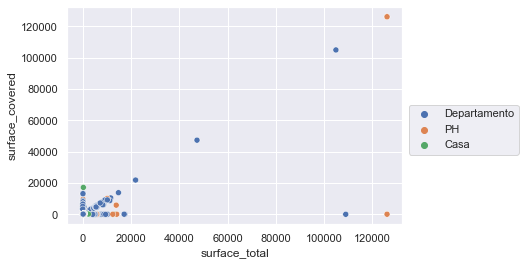

In [4]:
#existen casos donde la superficie cubierta es mayo que la superficie total. 
df_cf2 = df_cf.copy()
sns.scatterplot(data=df_cf2, x='surface_total', y='surface_covered',hue="property_type")
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

In [5]:
df_cf3 = df_cf2.drop(df_cf2.loc[df_cf2['surface_covered'] > df_cf2['surface_total']].index)

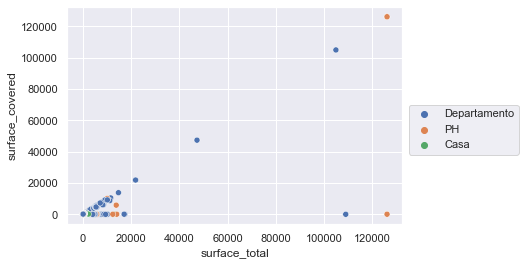

In [6]:
#existen casos donde la superficie cubierta es mayo que la superficie total. 
sns.scatterplot(data=df_cf3, x='surface_total', y='surface_covered',hue="property_type")
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

### Filas duplicadas

Filas que tienen los mismos valores para cada columna

In [7]:
duplicado = df_cf3.duplicated()
df_cf3[duplicado].count()

start_date         1611
end_date           1611
created_on         1611
lat                1458
lon                1458
l1                 1611
l2                 1611
l3                 1611
rooms              1611
bedrooms           1611
bathrooms          1587
surface_total      1411
surface_covered    1400
price              1611
currency           1611
title              1611
description        1611
property_type      1611
operation_type     1611
dtype: int64

In [8]:
print(df_cf3.shape)
df_cf3.drop_duplicates(inplace=True)
print(df_cf3.shape)

(90725, 19)
(89114, 19)


### Reduciendo columnas
Limitamos columnas mas relevantes

In [9]:
for i in range(df_cf3.shape[1]):
    print(i,len(pd.unique(df_cf3.iloc[:,i])))

0 362
1 408
2 362
3 31132
4 31401
5 1
6 1
7 57
8 19
9 16
10 14
11 716
12 572
13 5179
14 1
15 42579
16 57932
17 3
18 1


In [10]:
for i in range(df_cf3.shape[1]):
    num=len(pd.unique(df_cf3.iloc[:,i]))
    porcentaje=float(num)/df_cf3.shape[0]*100
    print("%d, %d, %.1f%%"%(i,num,porcentaje))

0, 362, 0.4%
1, 408, 0.5%
2, 362, 0.4%
3, 31132, 34.9%
4, 31401, 35.2%
5, 1, 0.0%
6, 1, 0.0%
7, 57, 0.1%
8, 19, 0.0%
9, 16, 0.0%
10, 14, 0.0%
11, 716, 0.8%
12, 572, 0.6%
13, 5179, 5.8%
14, 1, 0.0%
15, 42579, 47.8%
16, 57932, 65.0%
17, 3, 0.0%
18, 1, 0.0%


In [48]:
df_cf3 = df_cf3.drop(["start_date","end_date","title","description","l1","l2","currency","operation_type"],axis=1)

KeyError: "['start_date' 'end_date' 'title' 'description' 'l1' 'l2' 'currency'\n 'operation_type'] not found in axis"

#### Correlacion

<AxesSubplot:>

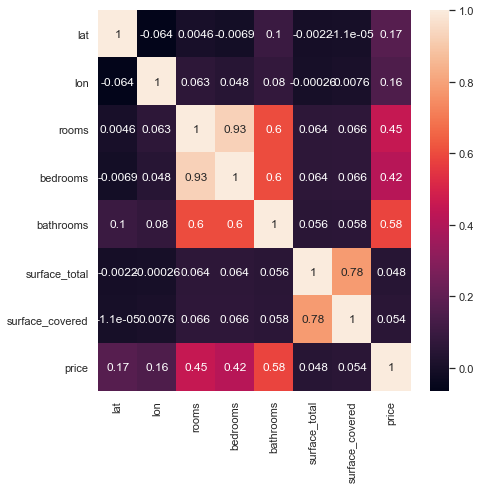

In [12]:
fig =plt.subplots(figsize=(7,7))
sns.heatmap(df_cf3.corr(), annot=True)

In [32]:
df_cf4 = df_cf3.copy()

In [33]:
df_cf4.isnull().sum()

created_on            0
lat                4376
lon                4390
l3                    0
rooms                 0
bedrooms              0
bathrooms          2139
surface_total      8717
surface_covered    9024
price                 0
property_type         0
dtype: int64

#### imputacion estadistica

In [15]:
#Definimos variables de preuba y testeo
X= df_cf4.drop(["price","created_on","lat","lon","property_type","l3"],axis=1)
y = df_cf4["price"]
X.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,7.0,7.0,2.0,140.0,140.0
1,2.0,1.0,2.0,70.0,58.0
2,2.0,1.0,1.0,45.0,45.0
3,2.0,1.0,1.0,85.0,50.0
5,2.0,1.0,1.0,56.0,56.0


In [16]:
X.isnull().sum()

rooms                 0
bedrooms              0
bathrooms          2139
surface_total      8717
surface_covered    9024
dtype: int64

Arbol Regresor

In [17]:
#definimos el modelo
tree = DecisionTreeRegressor()
resultado = []
tipos = ['mean','median','most_frequent','constant']

#funcion para evaluar modelos con Arboles.
for t in tipos:
    imputer = SimpleImputer(strategy=t)
    imputer.fit(X)
    X_trans= imputer.transform(X)
    
    tree= DecisionTreeRegressor( max_depth=10,random_state=42)
    tree.fit(X_trans,y)
    y_pred= tree.predict(X_trans)
    MAE_train=mean_absolute_error(y,y_pred)
    RMSE=np.sqrt(mean_squared_error(y,y_pred))
    r2 = metrics.r2_score(y, y_pred)
    resultado.append(r2)
    #imprimimos los resultado en funcion del precio que queremos estimar   
    print('RSME',RMSE.round(0),"Segun",t)
    print('MAE',MAE_train.round(0),"Segun",t)
    print("----------------------------------------")
    

RSME 132791.0 Segun mean
MAE 62675.0 Segun mean
----------------------------------------
RSME 132767.0 Segun median
MAE 62723.0 Segun median
----------------------------------------
RSME 132253.0 Segun most_frequent
MAE 62424.0 Segun most_frequent
----------------------------------------
RSME 131878.0 Segun constant
MAE 62199.0 Segun constant
----------------------------------------


In [18]:
print('Missing: %d' % sum(np.isnan(X_trans).flatten()))

Missing: 0


In [19]:
vecinos = [6]
for v in vecinos:
    KNN_imputer=KNNImputer(n_neighbors=v)
    KNN_imputer.fit(X)
    X_knn= KNN_imputer.transform(X)
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_knn,y)
    y_pred = tree.predict(X_knn)
    r2 = metrics.r2_score(y, y_pred)
    arbol_MAE=mean_absolute_error(y,y_pred)
    RMSE=np.sqrt(mean_squared_error(y,y_pred))
    resultado.append(r2)
    print("La cantidad de vecinos utilizados--->",v)
    print('RSME',RMSE.round(0))
    print('MAE',arbol_MAE.round(0))
    print("----------------------------------------")

La cantidad de vecinos utilizados---> 6
RSME 130394.0
MAE 61762.0
----------------------------------------


In [20]:
print('Missing: %d' % sum(np.isnan(X_knn).flatten()))

Missing: 0


### Aplicacion del KNNImputer en dataset¶

In [34]:
df_cf4.isnull().sum()

created_on            0
lat                4376
lon                4390
l3                    0
rooms                 0
bedrooms              0
bathrooms          2139
surface_total      8717
surface_covered    9024
price                 0
property_type         0
dtype: int64

In [37]:
KNN_imputer=KNNImputer(n_neighbors=6)
KNN_imputer=KNN_imputer.fit(df_cf4.iloc[:,6:9])
df_cf4.iloc[:,6:9]=KNN_imputer.transform(df_cf4.iloc[:,6:9])

In [38]:
KNN_imputer=KNNImputer(n_neighbors=6)
KNN_imputer=KNN_imputer.fit(df_cf4.iloc[:,1:3])
df_cf4.iloc[:,1:3]=KNN_imputer.transform(df_cf4.iloc[:,1:3])

In [39]:
df_cf4.isnull().sum()

created_on         0
lat                0
lon                0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [40]:
df_cf4.shape

(89114, 11)

<AxesSubplot:>

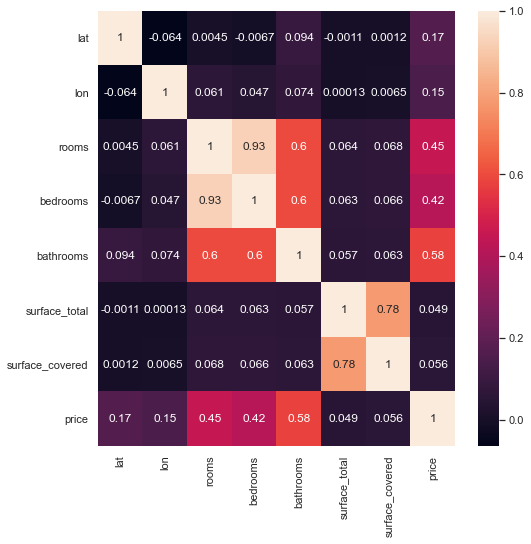

In [41]:
fig =plt.subplots(figsize=(8,8))
sns.heatmap(df_cf4.corr(), annot=True)

### Outiers

#### Metodo IQR

In [42]:
#definimos los cuantiles
Q1= df_cf4.quantile(0.25)
Q3= df_cf4.quantile(0.75)
IQR = Q3-Q1
#aplicamos a todas las columnas del df
df_cf4=df_cf4[~((df_cf4<(Q1-1.5*IQR))|(df_cf4>(Q3+1.5*IQR))).any(axis=1)]
df_cf4.shape

<ipython-input-42-fac36626061d>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cf4=df_cf4[~((df_cf4<(Q1-1.5*IQR))|(df_cf4>(Q3+1.5*IQR))).any(axis=1)]
<ipython-input-42-fac36626061d>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cf4=df_cf4[~((df_cf4<(Q1-1.5*IQR))|(df_cf4>(Q3+1.5*IQR))).any(axis=1)]


(75582, 11)

Text(0.5, 0, 'property type')

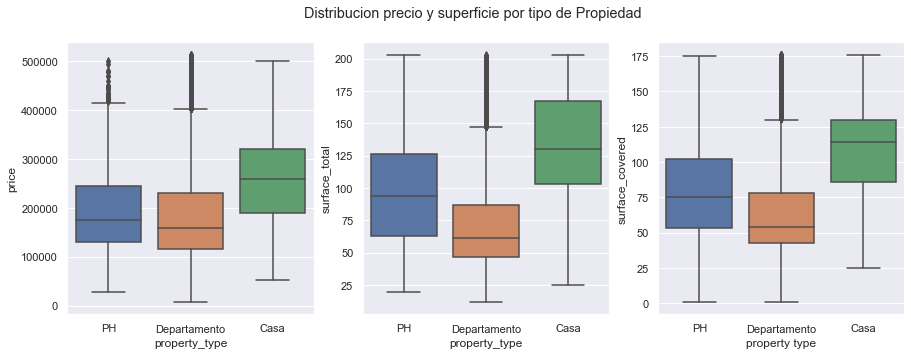

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Distribucion precio y superficie por tipo de Propiedad')
sns.boxplot(data=df_cf4, x='property_type', y='price',ax=ax1)
sns.boxplot(data=df_cf4, x='property_type', y='surface_total',ax=ax2)
sns.boxplot(data=df_cf4, x='property_type', y='surface_covered',ax=ax3)
plt.xlabel ( 'property type' ) 

<AxesSubplot:>

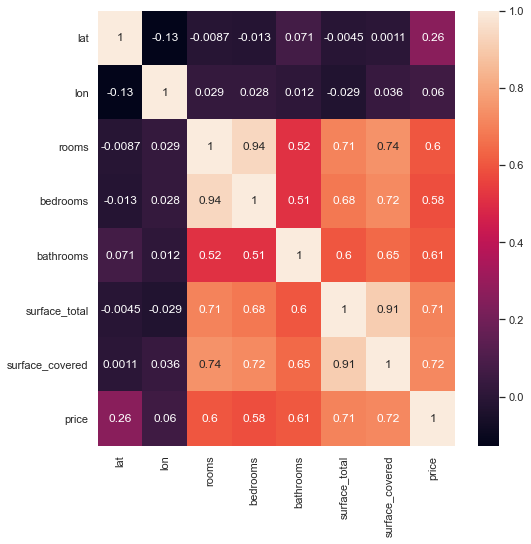

In [44]:
fig =plt.subplots(figsize=(8,8))
sns.heatmap(df_cf4.corr(), annot=True)

## Encoding

In [47]:
df_cf4.head()

,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,2019-10-17,-34.624056,-58.412110,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2019-10-17,-34.593569,-58.427474,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2019-10-17,-34.581294,-58.436754,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2019-10-17,-34.593779,-58.441239,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
6,2019-10-17,-34.600988,-58.433061,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH
